# **Predictive Analysis of Income Based on Demographic and Work Characteristics**

-------------

## **Objective**

This study employs machine learning techniques to predict income levels based on a diverse set of demographic and employment attributes. By analyzing factors such as age, education, occupation, and work hours per week, the research aims to uncover patterns and insights that contribute to understanding income disparities and predicting future earnings*

## **Data Source**

The dataset used for this analysis is sourced from the YBI Foundation GitHub repository. It consists of demographic and employment-related attributes collected from individuals, aimed at predicting income levels based on various factors. The dataset is publicly accessible and can be found here https://github.com/YBIFoundation/Dataset/blob/main/AdultIncome.csv

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## **Import Data**

In [2]:
# URL of the CSV file on GitHub
url = "https://github.com/YBIFoundation/Dataset/raw/main/AdultIncome.csv"

# Load the data into a DataFrame
df = pd.read_csv(url)

# Display the first few rows to verify it's loaded correctly
print(df.head())


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0              40   United-States   <=50

## **Describe Data**

In [ ]:
The dataset contains demographic and employment-related attributes of individuals, primarily aimed at predicting income levels based on various factors. Here are the key attributes included:

Age: Age of the individual.
Workclass: Type of employer the individual has (e.g., private, self-employed, government).
Final Weight (fnlwgt): Adjusted weight to reflect the population characteristics in Census data.
Education: Highest level of education completed by the individual.
Education Number (education-num): Numeric representation of education level.
Marital Status: Marital status of the individual.
Occupation: Type of job the individual has.
Relationship: Relationship status of the individual.
Race: Race of the individual.
Sex: Gender of the individual.
Capital Gain: Capital gains recorded.
Capital Loss: Capital losses recorded.
Hours per Week: Average number of hours worked per week.
Country: Country of origin.
Salary: Income level, categorized into binary classes (<=50K, >50K).

## **Data Visualization**

C:\Users\manav\AppData\Local\Temp\ipykernel_22060\2401391265.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette='viridis')
C:\Users\manav\AppData\Local\Temp\ipykernel_22060\2401391265.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='hours-per-week', data=df, palette='Set2')
C:\Users\manav\AppData\Local\Temp\ipykernel_22060\2401391265.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Pastel2')


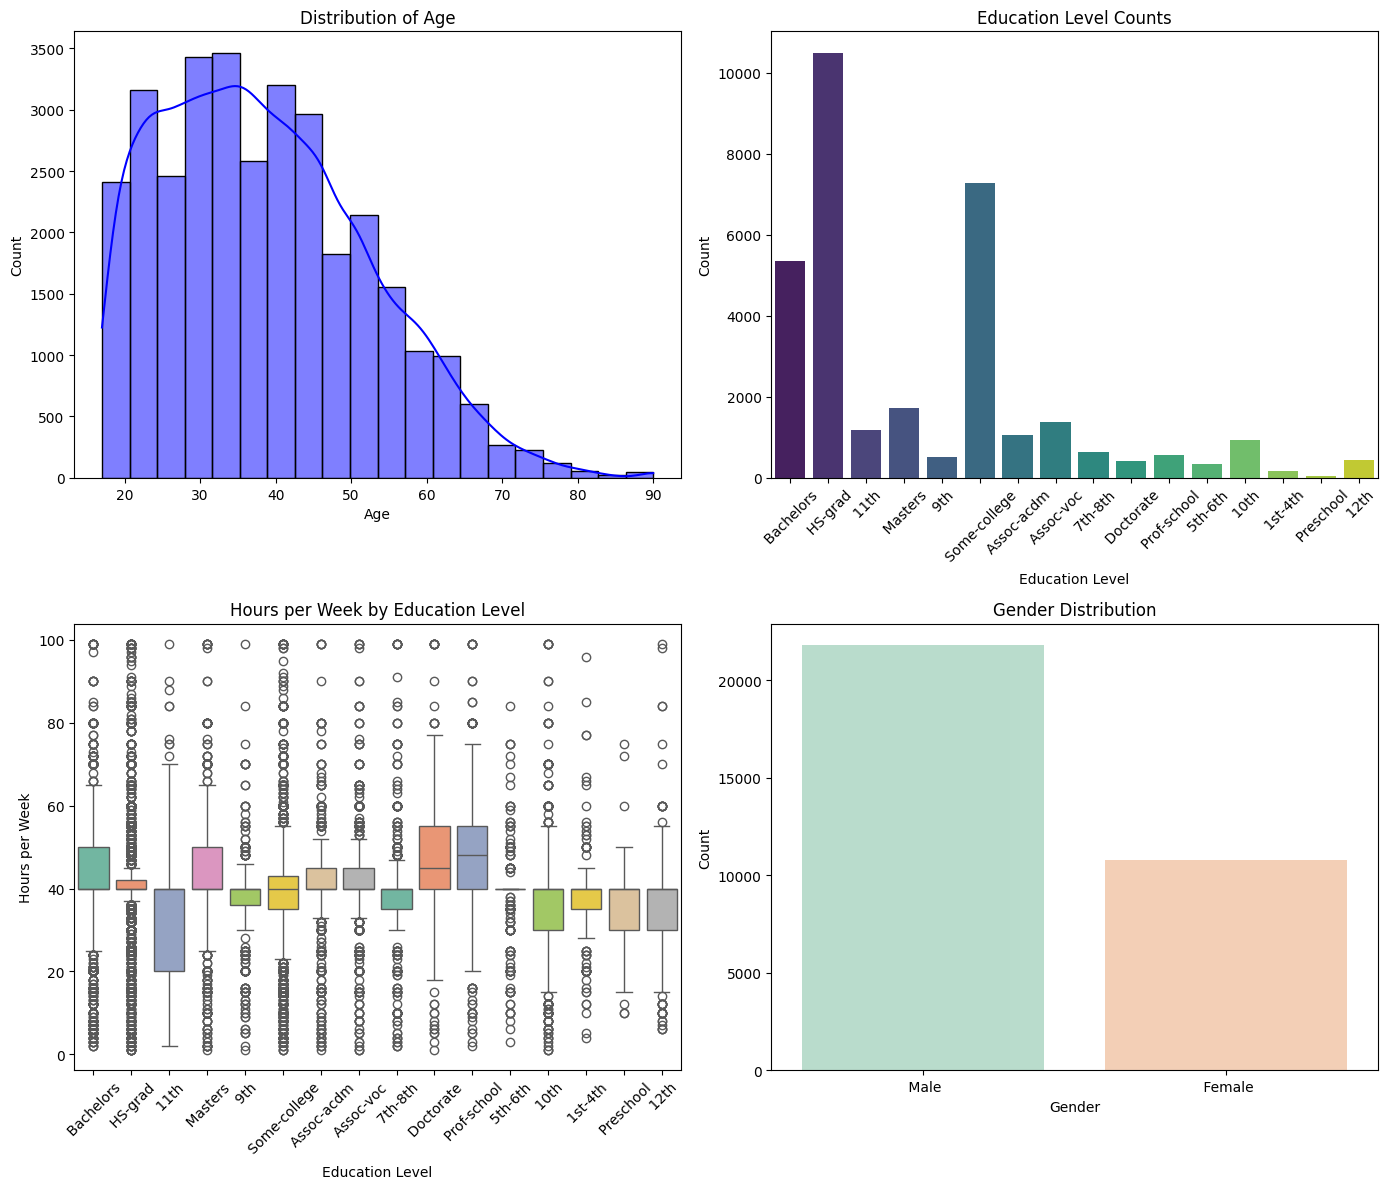

In [6]:
# Plotting
plt.figure(figsize=(14, 12))

# 1: Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# 2: Education Level Counts
plt.subplot(2, 2, 2)
sns.countplot(x='education', data=df, palette='viridis')
plt.title('Education Level Counts')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 3: Boxplot of Hours per Week by Education Level
plt.subplot(2, 2, 3)
sns.boxplot(x='education', y='hours-per-week', data=df, palette='Set2')
plt.title('Hours per Week by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)

# 4: Gender Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='sex', data=df, palette='Pastel2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [15]:
# Handle missing values (if any)
df.dropna(inplace=True)  # Drop rows with missing values, or use df.fillna() to fill missing values

# Display the first few rows of the dataset to verify
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0        

## **Define Target Variable (y) and Feature Variables (X)**

In [16]:
# Define features (X) and target (y)
X = df.drop('salary', axis=1)  # Features: all columns except 'salary'
y = df['salary']  # Target variable: 'salary'

# Display the first few rows of X and y to verify
print("\nFeatures (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  
0          2174             0              40   United-States

## **Train Test Split**

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (26048, 14)
Shape of X_test: (6513, 14)
Shape of y_train: (26048,)
Shape of y_test: (6513,)


## **Modeling**

In [18]:
# Preprocessing pipeline for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

## **Model Evaluation and prediction**

In [19]:

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8581298940580377

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.75      0.61      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513


Confusion Matrix:
 [[4623  319]
 [ 605  966]]


## **Explaination**

Certainly! Let's go through the project steps and concepts with explanations and meanings without including the actual code.

### Project Overview: Predictive Analysis of Income Based on Demographic and Work Characteristics

#### Step 1: Data Loading and Initial Inspection

**Data Loading**: In this step, we load a dataset (`AdultIncome.csv`) that contains various attributes about individuals, such as age, education, occupation, marital status, and more. This dataset is crucial as it forms the foundation for our machine learning project.

**Initial Inspection**: After loading the dataset, we typically perform an initial inspection to understand its structure and contents. This helps us ensure that the data is loaded correctly and gives us insights into the types of features available for analysis.

#### Step 2: Data Processing and Preparation

**Data Processing**: This involves cleaning and transforming the raw data into a format suitable for machine learning models. Common tasks include handling missing values, encoding categorical variables into numerical format (if necessary), and scaling numerical features to a standardized range.

**Defining Target and Feature Variables**:
- **Target Variable (`y`)**: This is the variable we want to predict. In this project, the target variable is typically `salary`, which is categorized into income levels (`<=50K` and `>50K`).
  
- **Feature Variables (`X`)**: These are the input variables that are used to predict the target variable. Features in our dataset may include attributes like age, education level, occupation, marital status, etc.

#### Step 3: Train-Test Split

**Train-Test Split**: To evaluate the performance of our machine learning model, we divide the dataset into two separate sets:
- **Training Set**: This subset of data is used to train the model. The model learns the patterns and relationships between the input features (`X_train`) and the target variable (`y_train`).
  
- **Testing Set**: This subset of data is used to evaluate the model's performance on unseen data. It helps us assess how well the model generalizes to new data and avoids overfitting.

#### Step 4: Modeling

**Modeling**: In this step, we select an appropriate machine learning algorithm and build a predictive model using the training data (`X_train` and `y_train`). Common algorithms include logistic regression, decision trees, random forests, support vector machines, etc.

**Preprocessing**: Before feeding the data into the model, we often preprocess the features (`X`) to standardize or transform them. This can involve techniques like scaling numerical features to a similar range (using StandardScaler) and encoding categorical variables into a numerical format (using One-Hot Encoding).

#### Step 5: Model Evaluation and Prediction

**Model Evaluation**: Once the model is trained, we evaluate its performance using various metrics:
- **Accuracy**: Measures the proportion of correctly classified instances out of the total instances.
  
- **Precision**: Measures the proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions.
  
- **Recall (Sensitivity)**: Measures the proportion of true positive predictions out of all actual positive instances.
  
- **F1-Score**: Harmonic mean of precision and recall, providing a balance between the two metrics.
  
- **Confusion Matrix**: A table that summarizes the performance of a classification model, showing the counts of true positives, true negatives, false positives, and false negatives.

**Prediction**: After evaluating the model's performance on the test set (`X_test`), we can use the trained model to make predictions on new, unseen data. This step demonstrates how well our model can predict income levels (`salary`) based on the input features.

### Project Conclusion

This project showcases a typical workflow for building and evaluating a machine learning model for income prediction. It emphasizes the importance of data preprocessing, model selection, evaluation metrics, and performance assessment. The project aims to provide insights into factors influencing income disparities and to develop a predictive model that can generalize well to new data.

By following these steps and understanding the underlying concepts, we can effectively apply machine learning techniques to solve real-world problems like income prediction based on demographic and employment-related attributes. Adjustments and refinements can be made to the model and evaluation metrics based on specific dataset characteristics and project objectives.